## TP4

Integrantes:
* Martín Fosco LU: 449/13
* Javier Minces LU: 231/13

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

### 1 - Creación del grafo
Para cada línea, nos quedamos con la columna de autores, con cada uno separado por &. Agregamos un nodo por autor, si no existía, y un eje para cada par de autores

In [3]:
db = pd.read_csv("data.csv", names = ["Años", "LetrasYNros", "Areas", "Autores", "Nombres"], error_bad_lines=False)
db


,Años,LetrasYNros,Areas,Autores,Nombres
0,1992,B368,Nucl.Phys.,Horne & Horowitz,Exact Black String Solutions in Three Dimens...
1,1992,B278,Phys. Lett.,Mikovic,Hamiltonian construction of W-gravity actions
2,1991,A6,Mod. Phys. Lett.,Huitu & Nemeschansky,Supersymmetric Gelfand-Dickey Algebra
3,1992,B373,Nucl.Phys.,Witten,Ground Ring Of Two Dimensional String Theory
4,1991,A6,Mod.Phys.Lett.,Intriligator,Fusion Residues
5,1991,A6,Mod. Phys. Lett.,Ooguri & Sasakura,Discrete and Continuum Approaches to Three-D...
6,1992,A7,Int. J. Mod. Phys.,LeCLair & Smirnov,Infinite Quantum Group Symmetry of Fields in...
7,1992,B372,Nucl.Phys.,Griffin,Solving 3+1 QCD on the Transverse Lattice Us...
8,1992,B274,Phys. Lett.,Sen,Twisted Black p-Brane Solutions in String Th...
9,1992,B372,Nucl.Phys.,Lerche & Smit & Warner,Differential Equations for Periods and Flat ...


### Graficación de un subgrafo

### 2 -  Distribución de grado
Obtenemos el grado de cada nodo y luego procedemos a contar cuántos nodos hay de cada uno. Aparentemente la distribución es exponencial debido a que al verla en el gráfico semilog tiene la parece ser lineal.

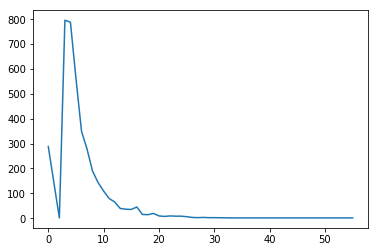

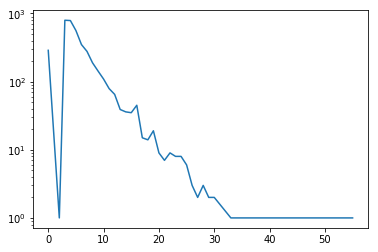

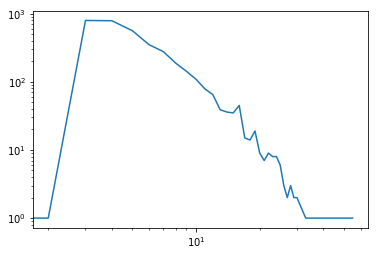

In [72]:
degree = (graph.degree())
dict_degree = dict()
for tupla in degree:
    if tupla[1] in dict_degree:
        dict_degree[tupla[1]] += 1
    else:
        dict_degree[tupla[1]] = 1
            
plt.plot(list(dict_degree.keys()), list(dict_degree.values()))
plt.show()

plt.plot(list(dict_degree.keys()), list(dict_degree.values()))
plt.yscale("log")
plt.show()

plt.plot(list(dict_degree.keys()), list(dict_degree.values()))
plt.yscale("log")
plt.xscale("log")
plt.show()

### 3 - Componentes conexas

In [1]:
print (nx.number_connected_components(graph))

def get_largest_component(graph):
    maxnodes = max([len(subgraph) for subgraph in (nx.connected_components(graph))])

    for subgraph in (nx.connected_components(graph)):
        if len(subgraph) == maxnodes:
            gigante = subgraph
            
    return graph.subgraph(gigante)

compGigante = get_largest_component(graph)
print "Cantidad de nodos: ", (compGigante.number_of_nodes())              
#nx.draw_circular(compGigante, node_size=20)

#plt.show()

NameError: name 'nx' is not defined

### 4 - Tamaños de vecindades
Calculamos con un algoritmo nuestro y con el de la librería la cantidad de vecinos de grado hasta un valor k que va variando. Cada línea del gráfico es el resultado con un nodo semilla distinto.

Para cada nodo semilla el momento en el que pasan de una zona local a conocer a la mayor parte del grafo es distinto, tomando el k entre 5 y 8. El promedio del camino, que se calcula en la próxima sección, es de alrededor de 6 pasos. Es decir que la afirmación de los seis grados de separación aplica también a la componente gigante de la red de autores; no a la red completa porque hay subgrafos aislados.

Es decir que tiene una distribución similar a la red de "conocidos", aunque en el próximo ítem no la consideremos de "mundo pequeño"

In [20]:
def flatten(sets_list):
    if len(sets_list) == 0: return set([])
    return set(reduce(lambda x, y: set(x).union(y), sets_list))

#def k_nearest_neighbours(graph, node, k):
#    return k_nearest_neighbours(graph, node, k, set())
    
def k_nearest_neighbours(graph, node, k, already_added_neighbours):
    if k == 0: return []
    neighbours = set(graph.neighbors(node))
    not_explored_neighbours = neighbours - already_added_neighbours    
    
    #already_added_neighbours |= not_explored_neighbours
    
    neighbours_with_repetitions = \
        neighbours | \
        flatten(
           map(lambda node_i:
                k_nearest_neighbours(
                    graph,
                    node_i,
                    k-1,
                    already_added_neighbours | not_explored_neighbours
                ),
           list(not_explored_neighbours)
           )
        )
    return neighbours_with_repetitions - set([node])

In [33]:
def k_nearest_neighbours(graph, node, k):
    dict_path_length = nx.shortest_path_length(graph, nodo)
    return [node for node in dict_path_length if dict_path_length[node] <= k]

In [131]:
n = compGigante.number_of_nodes()
print n

neighbours_by_degree = []
dif = []
mx = 0
for i in range(10):
    nodo = compGigante.nodes().items()[random.randint(0, n)][0]
    neighbours_by_degree.append([len(k_nearest_neighbours(compGigante, nodo, i)) for i in range(9)])
    dif.append([neighbours_by_degree[-1][i + 1] - neighbours_by_degree[-1][i] for i in range(8)])
    mx = max(mx, max(dif[-1]))
print "Mayor cantidad de nuevos autores alcanzados en un paso:", mx

2998
Mayor cantidad de nuevos autores alcanzados en un paso: 1076


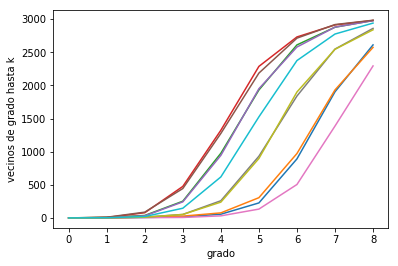

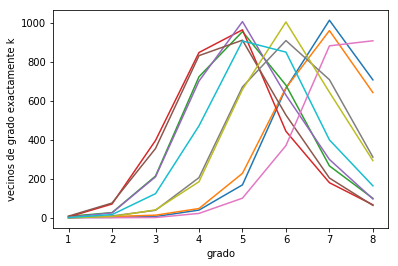

In [129]:
for y in neighbours_by_degree:
    plt.plot(range(len(y)), y)
    plt.xlabel("grado")
    plt.ylabel("vecinos de grado hasta k")
plt.show()

for y in dif:
    plt.plot(range(1, len(y) + 1), y)
    plt.xlabel("grado")
    plt.ylabel("vecinos de grado exactamente k")
plt.show()

### 5 - Mundos pequeños
A juzgar por la comparación de la componente gigante con el grafo aleatorio generado, la componente gigante no es un caso de "mundo pequeño". Nuestro grafo, con un clustering mucho mayor, tiene un shortest path length mayor al del grafo random.

In [143]:
degree_seq = [i[1] for i in compGigante.degree()]
rnd = nx.random_degree_sequence_graph(degree_seq)
#rnd = nx.expected_degree_graph(degree_seq)
# No puedo calcular avg_shortest_path_length si el grafo no es conexo
giganternd = get_largest_component(rnd)
#chequeo de que los grafos sean similares
print "Componente gigante:", compGigante.number_of_nodes(), "nodos,", compGigante.number_of_edges(), "aristas"
print "Grafo random:", giganternd.number_of_nodes(), "nodos,", giganternd.number_of_edges(), "aristas"

print "Average clustering componente gigante: ", nx.average_clustering(compGigante)
print "Average clustering grafo random: ", nx.average_clustering(giganternd)

print "Average shortest path length componente gigante: ", nx.average_shortest_path_length(compGigante)
print "Average shortest path length grafo random: ", nx.average_shortest_path_length(giganternd)

Componente gigante: 2998 nodos, 10168 aristas
Grafo random: 2998 nodos, 10168 aristas
Average clustering componente gigante:  0.482611557627
Average clustering grafo random:  0.00338438073422
Average shortest path length componente gigante:  6.11723486885
Average shortest path length grafo random:  4.17843794428


### 6 - Estrellas
Al calcular los autores estrellas encontramos que "Lee" tenía un valor mucho mayor de betweenness que cualquier otro autor. Lo mismo ocurre con el grado.
Dado que "lee" es un apellido relativamente común, es posible que el alto grado de conexión este nodo se deba a la existencia de varios autores de apellido "Lee" distintos (no tenemos el nombre para distinguirlos). También aparecen el los mayores 10 "Kim", "Park" y "Lee".

Los 10 mayores autores por betweenness y por grado son los mismos, en el mismo orden.

Eliminar los autores por orden descendente de betwenness/degree no parte la componente gigante. Sí deja algunos nodos aparte, pero sólo desaparece copmletamente luego de eliminar ~450 autores. 

In [ ]:
dict_bet = nx.betweenness_centrality(compGigante)

[('lee', 0.0793594358671093), ('vafa', 0.055389943730057324), ('kim', 0.052591763935535385), ('kogan', 0.03695306353059902), ('park', 0.03645170548597596), ('ferrara', 0.033220857515393776), ('ohta', 0.03319721183003022), ('gibbons', 0.033089141545656765), ('li', 0.0326230628969502), ('ivanov', 0.03101121858196807)]


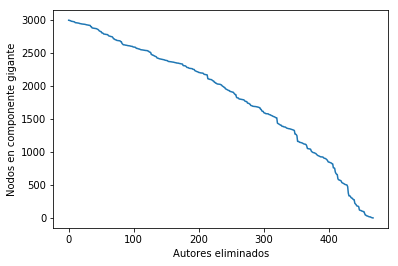

[('lee', 55), ('vafa', 36), ('kim', 39), ('kogan', 24), ('park', 40), ('ferrara', 37), ('ohta', 24), ('gibbons', 30), ('li', 22), ('ivanov', 28)]


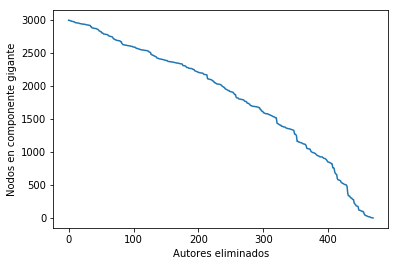

In [128]:
sorted_dict_bet = sorted(dict_bet, key=dict_bet.get)[::-1]
gigante_copy = compGigante.copy()
#Top 10 por betweenness
nodes = []
print [(sorted_dict_bet[i], dict_bet[sorted_dict_bet[i]]) for i in range(10)]
for author in sorted_dict_bet[:len(sorted_dict_bet)/2]:
    if author in gigante_copy.nodes():
        gigante_copy.remove_node(author)
        gigante_copy = nx.Graph(get_largest_component(gigante_copy))
        nodes.append(gigante_copy.number_of_nodes())

plt.plot(range(len(nodes)), nodes)
plt.xlabel("Autores eliminados")
plt.ylabel("Nodos en componente gigante")
plt.show()

dict_degree = dict(graph.degree())
sorted_dict_degree = sorted(dict_degree, key=dict_bet.get)[::-1]
gigante_copy = compGigante.copy()
#Top 10 por degree
nodes = []
print [(sorted_dict_degree[i], dict_degree[sorted_dict_degree[i]]) for i in range(10)]
for author in sorted_dict_bet[:len(sorted_dict_degree)/2]:
    if author in gigante_copy.nodes():
        gigante_copy.remove_node(author)
        gigante_copy = nx.Graph(get_largest_component(gigante_copy))
        nodes.append(gigante_copy.number_of_nodes())

plt.plot(range(len(nodes)), nodes)
plt.xlabel("Autores eliminados")
plt.ylabel("Nodos en componente gigante")
plt.show()

La segunda componente conexa más grande tiene sólo 11 nodos, así que la componente gigante sigue siendo gigante hasta que desaparece

In [126]:
def get_nodes_second_largest(graph):
    graph_copy = graph.copy()
    largest_nodes = list(get_largest_component(graph_copy).nodes())
    graph_copy.remove_nodes_from(largest_nodes)
    return get_largest_component(graph_copy).number_of_nodes()
    
print get_nodes_second_largest(graph)

11
